In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Styles

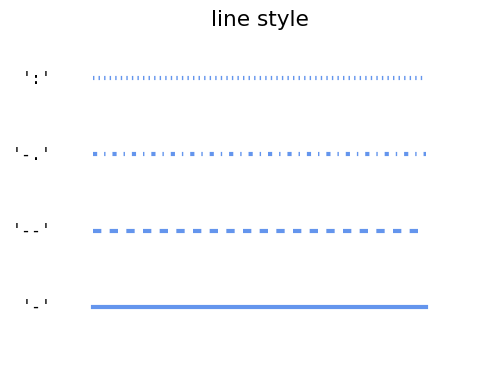

In [27]:
"""
Reference for line-styles included with Matplotlib.
"""

import numpy as np
import matplotlib.pyplot as plt

color = 'cornflowerblue'
points = np.ones(5)    # Draw 5 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                 fontsize=12, fontdict={'family': 'monospace'})

def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    
def nice_repr(text):
    return repr(text).lstrip('u')

# Plot all line styles.
f, ax = plt.subplots()

linestyles = ['-', '--', '-.', ':']
for y, linestyle in enumerate(linestyles):
    ax.text(-0.5,y,nice_repr(linestyle), **text_style)
    #ax.text(-0.5,y,linestyle, **text_style)
    ax.plot(y*points, linestyle=linestyle, color=color, linewidth=3)
    format_axes(ax)
    ax.set_title('line style')

plt.show()

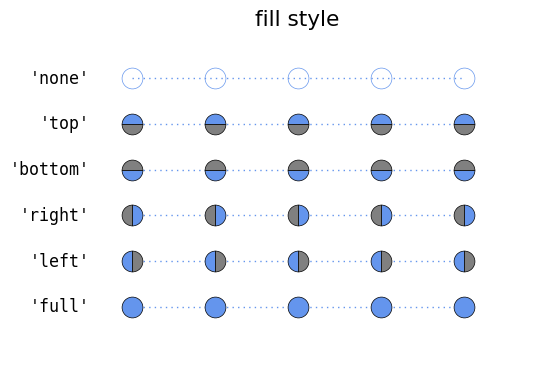

In [36]:
"""
Reference for marker fill-styles included with Matplotlib.
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

points = np.ones(5)   # Draw 3 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                 fontsize=12, fontdict={'family': 'monospace'})
marker_style = dict(color='cornflowerblue', linestyle=':', marker='o',
                   markersize=15, markerfacecoloralt='gray')

def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    
def nice_repr(text):
    return repr(text).lstrip('u')

fig, ax = plt.subplots()

# Plot all fill styles.
for y, fill_style in enumerate(Line2D.fillStyles):
    #print y,y*points
    ax.text(-0.5, y, nice_repr(fill_style), **text_style)
    ax.plot(y*points, fillstyle=fill_style, **marker_style)
    format_axes(ax)
    ax.set_title('fill style')
    
plt.show()

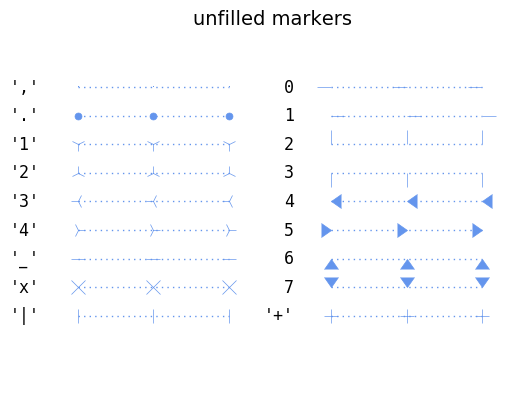

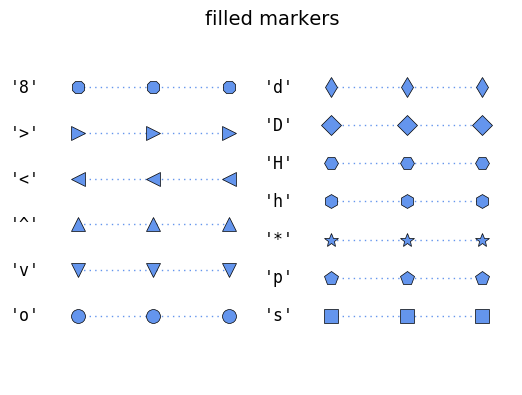

In [49]:
"""
Reference for filled- and unfilled-marker types included with Matplotlib.
"""

from six import iteritems
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

points = np.ones(3)    # Draw 3 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                 fontsize=12, fontdict={'family': 'monospace'})
marker_style = dict(linestyle=':', color='cornflowerblue', markersize=10)

def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    
def nice_repr(text):
    return repr(text).lstrip('u')

def split_list(a_list):
    i_half = len(a_list) // 2
    return (a_list[:i_half], a_list[i_half:])

# Plot all un-filled markers
# --------------------------

fig, axes = plt.subplots(ncols=2)

# Filter out filled markers and marker settings that do nothing.
# We use iteritems from six to make sure that we get an iterator
# in both python 2 and 3

unfilled_markers = [m for m, func in iteritems(Line2D.markers)
                   if func != 'nothing' and m not in Line2D.filled_markers]

# Reverse-sort for pretty. We use our own sort key which is essentially
# a python3 compatible reimplementation of python2 sort.

unfilled_markers = sorted(unfilled_markers, 
                         key=lambda x: (str(type(x)), str(x)))[::-1]

for ax, markers in zip(axes, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y*points, marker=marker, **marker_style)
        format_axes(ax)
fig.suptitle('unfilled markers', fontsize=14)


# Plot all filled markers.
# ------------------------

fig, axes = plt.subplots(ncols=2)
for ax, markers in zip(axes, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y*points, marker=marker, **marker_style)
        format_axes(ax)
fig.suptitle('filled markers', fontsize=14)

plt.show()